In [6]:
# Set up Kaggle API for downloading the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 21.7MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [8]:
# Extract the downloaded dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
# Make necessary imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators
# Load the training and validation datasets using TensorFlow's image_dataset_from_directory
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize the pixel values of images
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
# Create a convolutional neural network (CNN) model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 110ms/step - loss: 1.4404 - accuracy: 0.5646 - val_loss: 0.6600 - val_accuracy: 0.5668
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6374 - accuracy: 0.6395 - val_loss: 0.6148 - val_accuracy: 0.6816
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5749 - accuracy: 0.7008 - val_loss: 0.5619 - val_accuracy: 0.7096
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5006 - accuracy: 0.7456 - val_loss: 0.5362 - val_accuracy: 0.7510
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4452 - accuracy: 0.7843 - val_loss: 0.5146 - val_accuracy: 0.7692
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3859 - accuracy: 0.8145 - val_loss: 0.6618 - val_accuracy: 0.7314
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3441 - accuracy: 0.8366 - val_loss: 0.4439 - val_ac

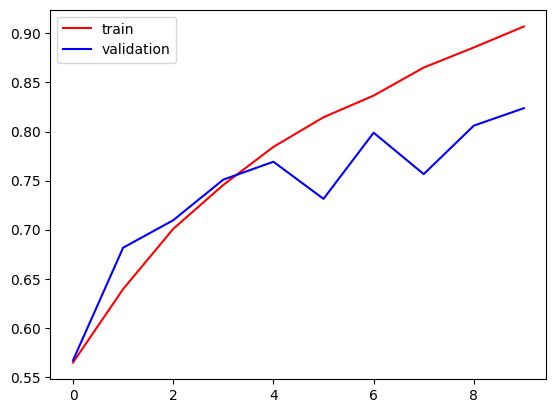

In [17]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

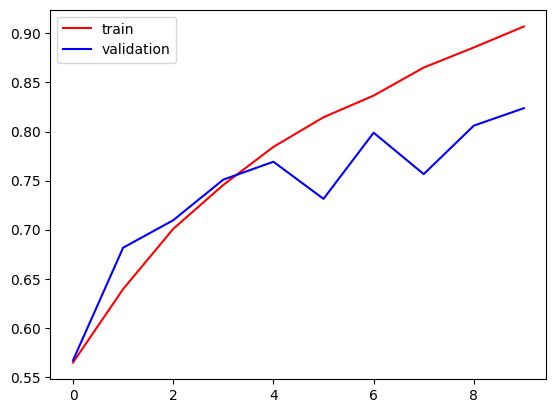

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

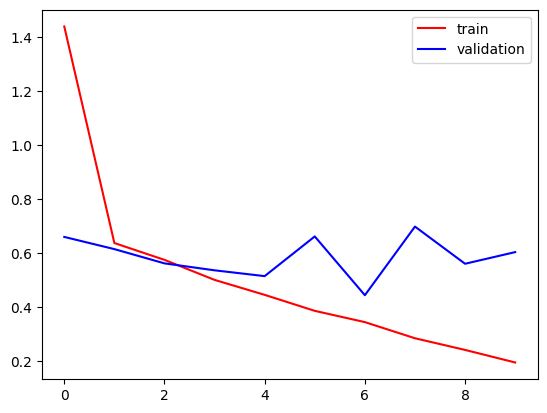

In [19]:
# Plot training and validation loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

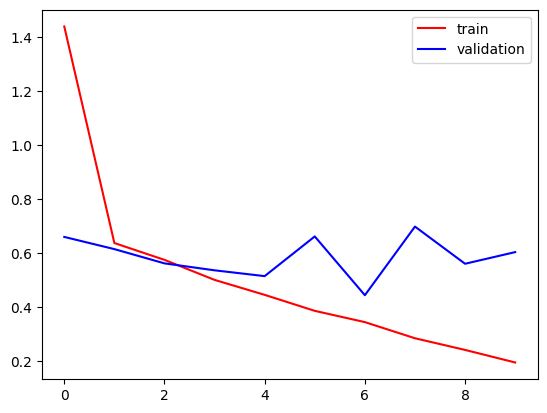

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [22]:
# Load a test image of a test_img1
test_img1 = cv2.imread('/content/test_img1.jpg')


In [23]:
test_img1.shape

(499, 403, 3)

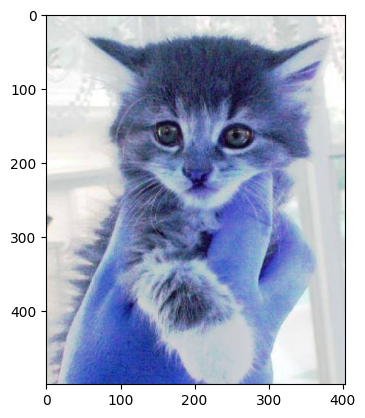

In [24]:

# Display the test image
plt.imshow(test_img1)

In [25]:
# Resize and preprocess the test image
test_img1 = cv2.resize(test_img1,(256,256))

In [26]:
import numpy as np
test_input1 = test_img1.reshape((1, 256, 256, 3))

In [27]:
# Predict the class of the test image
prediction = model.predict(test_input1)

# Define a threshold for classification
threshold = 0.5

# Convert the prediction to class label
if prediction <= threshold:
    predicted_class = 'dog'
else:
    predicted_class = 'cat'

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 397ms/step
Predicted class: cat


In [46]:
test_img2 = cv2.imread('/content/test_img2.jpg')

In [47]:
test_img2.shape

(397, 500, 3)

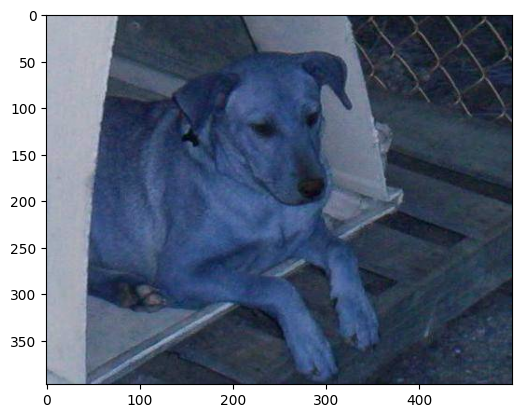

In [48]:
plt.imshow(test_img2)

In [49]:
test_img2 = cv2.resize(test_img2,(256,256))

In [50]:
test_input2 = test_img2.reshape((1, 256, 256, 3))

In [51]:
# Predict the class of the test image
prediction = model.predict(test_input2)

# Define a threshold for classification
threshold = 0.5

# Convert the prediction to class label
if prediction <= threshold:
    predicted_class = 'dog'
else:
    predicted_class = 'cat'

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 18ms/step
Predicted class: cat
